## Assignment 1.1

### Part 1

#### Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook

What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

In [16]:
# The problem with random networks in comparison to real world networks is that they do not capture how well real-world networks are actually connected. 
# Basically the clustering coefficient in real world networks is larger

List the four regimes that characterize random networks as a function of < k >

In [17]:
# Four regimes that characterize random network as a function of <k>
# Subcritical Regime: <k> < 1
# Critical Point: <k> = 1 - emergence of a giant component
# Supercritical Regime: <k> > 1
# Connected Regime: <k> > lnN

According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?

In [18]:
# In real-world networks, high-degree nodes (hubs) tend to have lower clustering coefficients because they connect to many nodes that are not directly 
# connected to each other. This leads to a hierarchical structure where low-degree 
# nodes form tightly-knit communities, while high-degree nodes serve as bridges between these communities. Random networks 
# do not capture this hierarchical organization and the associated clustering patterns, making them less representative of real-world networks.

#### WS edition

First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1 and 1.
Calculate the average shortest path length < d > for each one.

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

graph1 = nx.watts_strogatz_graph(500, 4, 0)
graph2 = nx.watts_strogatz_graph(500, 4, 0.1)
graph3 = nx.watts_strogatz_graph(500, 4, 1) 

avg_shortest_path1 = nx.average_shortest_path_length(graph1)
avg_shortest_path2 = nx.average_shortest_path_length(graph2)
avg_shortest_path3 = nx.average_shortest_path_length(graph3)

print("Average shortest path length for graph1 (p=0):", avg_shortest_path1)
print("Average shortest path length for graph2 (p=0.1):", avg_shortest_path2)
print("Average shortest path length for graph3 (p=1):", avg_shortest_path3)

Average shortest path length for graph1 (p=0): 62.875751503006015
Average shortest path length for graph2 (p=0.1): 7.686076152304609
Average shortest path length for graph3 (p=1): 4.741547094188377


Describe what happens to the network when p = 1

In [20]:
## When p=1 the network becomes a random graph, losing its regular structure and exhibiting properties typical of random networks, 
# such as shorter average path lengths and lower clustering coefficients.

Generate a lot of networks with different values of p. 
You will notice that paths are short when p is close to one and they are long when p=0. 
What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network.

In [21]:
p_values = [i/10 for i in range(11)]  # [0.0, 0.1, 0.2, ..., 1.0]

avg_shortest_paths = []

fully_random_network = nx.erdos_renyi_graph(500, 0.1)
avg_shortest_path_fully_random = nx.average_shortest_path_length(fully_random_network)

for p in p_values:
    graph = nx.watts_strogatz_graph(500, 4, p)
    avg_shortest_path = nx.average_shortest_path_length(graph)
    avg_shortest_paths.append(avg_shortest_path)
    print(f"Average shortest path length for p={p}: {avg_shortest_path} (compared to fully random: {avg_shortest_path_fully_random})")


Average shortest path length for p=0.0: 62.875751503006015 (compared to fully random: 1.9056112224448898)
Average shortest path length for p=0.1: 6.99664128256513 (compared to fully random: 1.9056112224448898)
Average shortest path length for p=0.2: 6.285731462925852 (compared to fully random: 1.9056112224448898)
Average shortest path length for p=0.3: 5.376993987975952 (compared to fully random: 1.9056112224448898)
Average shortest path length for p=0.4: 5.1949498997995995 (compared to fully random: 1.9056112224448898)
Average shortest path length for p=0.5: 4.995350701402805 (compared to fully random: 1.9056112224448898)
Average shortest path length for p=0.6: 4.835174348697395 (compared to fully random: 1.9056112224448898)
Average shortest path length for p=0.7: 4.787206412825651 (compared to fully random: 1.9056112224448898)
Average shortest path length for p=0.8: 4.7578997995991985 (compared to fully random: 1.9056112224448898)
Average shortest path length for p=0.9: 4.78203607214

In [22]:

## The average shortest path length gets close to that of a fully random network already at small values of 
# p =0.1 or 0.2, indicating that even a small amount of randomness in the network can significantly reduce path lengths.

Let's investigate this behavior in detail. Generate 50 networks with N = 500, < k > = 4, for each of p = {0, 0.01, 0.3, 0.05, 0.1, 0.2}. 
Calculate the average of < d > as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.

In [23]:

import numpy as np
p_values_detailed = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
avg_shortest_paths_detailed = []
std_dev_shortest_paths_detailed = []
num_networks = 50
fully_random_network = nx.erdos_renyi_graph(500, 0.1)
avg_shortest_path_fully_random = nx.average_shortest_path_length(fully_random_network)
print(f"Average shortest path length for fully random network: {avg_shortest_path_fully_random}")
for p in p_values_detailed:
    shortest_paths = []
    for _ in range(num_networks):
        graph = nx.watts_strogatz_graph(500, 4, p)
        avg_shortest_path = nx.average_shortest_path_length(graph)
        shortest_paths.append(avg_shortest_path)
    avg_shortest_paths_detailed.append(np.mean(shortest_paths))
    std_dev_shortest_paths_detailed.append(np.std(shortest_paths))

Average shortest path length for fully random network: 1.9045370741482965


Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.


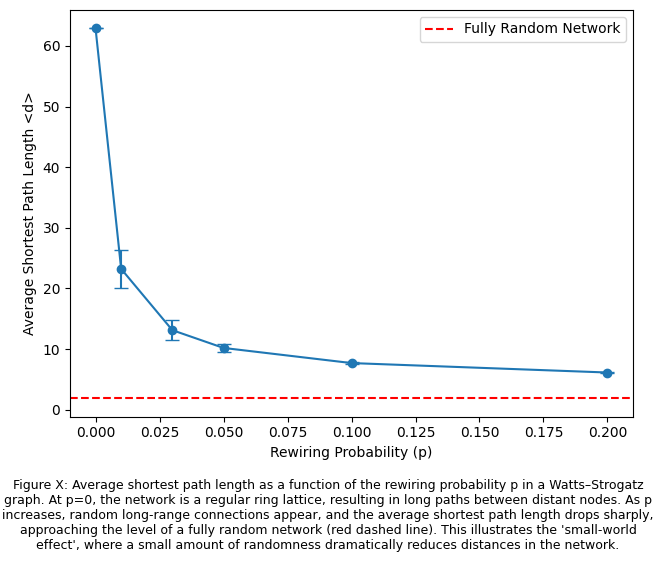

In [26]:
plt.errorbar(p_values_detailed, avg_shortest_paths_detailed,
             yerr=std_dev_shortest_paths_detailed, fmt='o-', capsize=5)
plt.axhline(y=avg_shortest_path_fully_random, color='r', linestyle='--',
            label='Fully Random Network')
plt.xscale('linear')

plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length <d>')
plt.legend()

# Nicely centered caption under the figure
plt.figtext(0.5, -0.15,
    "Figure X: Average shortest path length as a function of the rewiring probability p in a Watts–Strogatz graph. "
    "At p=0, the network is a regular ring lattice, resulting in long paths between distant nodes. "
    "As p increases, random long-range connections appear, and the average shortest path length drops sharply, "
    "approaching the level of a fully random network (red dashed line). This illustrates the 'small-world effect', "
    "where a small amount of randomness dramatically reduces distances in the network.",
    wrap=True, ha='center', fontsize=9)

plt.tight_layout()
plt.show()


### Part 2

### BA Edition

What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. 

In [ ]:
# # 1. Anomalous Regime with y<=2
# # For γ ‹ 2 the exponent 1/(γ− 1) is larger than one, hence the number of links connected to the largest hub grows faster than the size 
# # of the network. This means that for sufficiently large N the degree of the largest hub must exceed the total number of nodes in the network, 
# # hence it will run out of nodes to connect to. Similarly, for γ ‹ 2 the average degree 〈k〉 diverges in the N → ∞ limit


# # 2. Scale free regime with 2<y<3
# # In this regime the first moment of the degree distribution is finite but the second and higher moments diverge as N → ∞. Consequently 
# # scalefree networks in this regime are ultra-small. kmax grows with the size of the network 
# # with exponent 1/(γ - 1), which is smaller than one. Hence the market share of the largest hub, kmax /N, representing the fraction of 
# # nodes that connect to it, decreases as kmax/N ~ N-(γ-2)/(γ-1).


# 3.Random Network Regime with y>3
# for γ > 3 both the first and the second moments are finite. For all practical purposes the properties of a scale-free network in this regime 
# are difficult to distinguish from the properties a random network of similar size. The the average distance 
# between the nodes converges to the small-world formula derived for random networks. The reason is that for large γ the degree distribution 
# pk decays sufficiently fast to make the hubs small and less numerous.

What are the three regimes we find in non-linear preferential attachement

In [ ]:
# 1. Sublinear Preferential Attachment (0 < α < 1)
# For any α > 0 new nodes favor the more connected nodes over the less connected nodes. Yet, for α < 1 the bias is weak, 
# not sufficient to generate a scale-free degree distribution

#2. Superlinear Preferential Attachment (α > 1)
# For α > 1 the tendency to link to highly connected nodes is enhanced, accelerating the rich-gets-richer process. The consequence of this is most 
# obvious for α > 2, when the model predicts a winner-takes-all phenomenon: almost all nodes connect to a few super-hubs. Hence we observe the 
# emergence of a hub-and-spoke network, in which most nodes link directly to a few central nodes. The situation for 1 < α < 2 is less extreme, 
# but similar.

# 3. Linear Regime (α = 1):
#  This corresponds to the Barabási-Albert model, hence the degree distribution follows a power law.


#### We're going to create our own Barabasi-Albert model. Follow the recipe below for success:

First create a graph consisting of a single link.

In [27]:
import random
import numpy as np
graph = nx.Graph()

Now add another node, connecting one of the existing nodes in proportion to their degree.

In [28]:
graph.add_edge(0, 1)

Keep going until you have a 100 node network.
Hint: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using random.choice) corresponds to selecting a node with probability proportional to it's degree.

In [29]:
def add_nodes_to_graph_with_degrees(graph, num_nodes):
    new_graph = graph.copy()
    for new_node in range(2, num_nodes):
        edges = list(new_graph.edges())
        flattened_edges = [node for edge in edges for node in edge]
        chosen_node = random.choice(flattened_edges) ## Choosing uniformly from this list is equivalent to picking a node proportional to its degree.
        new_graph.add_edge(new_node, chosen_node)
    return new_graph

graph_100_nodes = add_nodes_to_graph_with_degrees(graph, 100)

Plot the network.

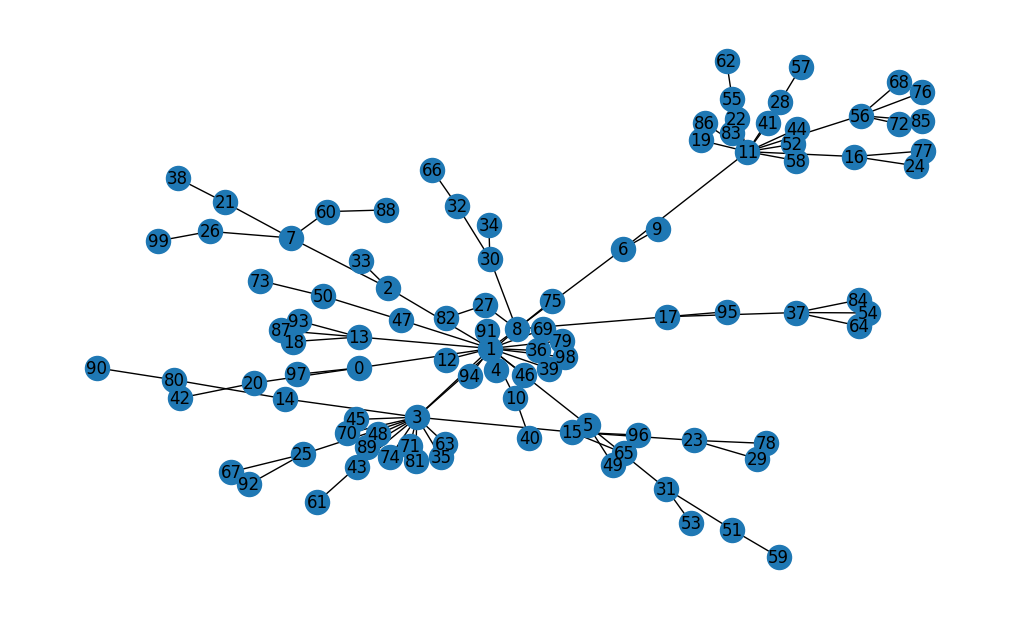

Maximum degree: 18, Minimum degree: 1


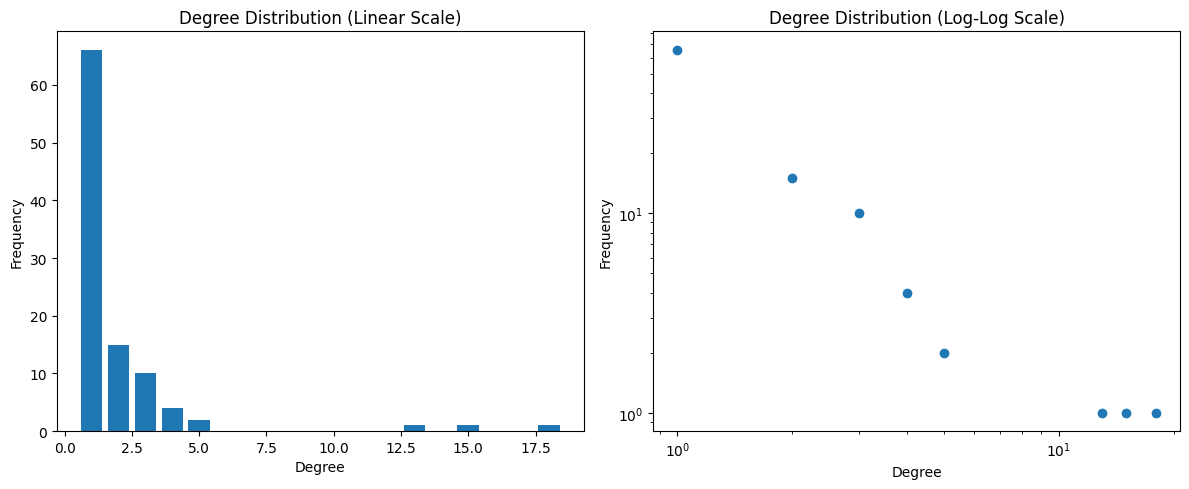

In [30]:
def plot_graph(graph):
    plt.figure(figsize=(10, 6))
    nx.draw(graph, with_labels=True)
    plt.show()

    degrees = [degree for node, degree in graph.degree()]
    max_degree = max(degrees)
    min_degree = min(degrees)
    print(f"Maximum degree: {max_degree}, Minimum degree: {min_degree}")

    # Now, bin the degree distribution using numpy.histogram.
    hist, bin_edges = np.histogram(degrees, bins=range(min_degree, max_degree + 2))
    # Plot the distribution. Plot it with both linear and log-log axes.
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.bar(bin_edges[:-1], hist, width=0.8, align='center')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution (Linear Scale)')
    plt.subplot(1, 2, 2)
    plt.loglog(bin_edges[:-1], hist, marker='o', linestyle='None')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution (Log-Log Scale)')
    plt.tight_layout()
    plt.show()

plot_graph(graph_100_nodes)

Add more nodes until you have a 5000 node network.

In [ ]:
graph_5000_nodes = add_nodes_to_graph_with_degrees(graph, 5000)

What's the maximum and minimum degree?

What's the maximum and minimum degree?

Now, bin the degree distribution using numpy.histogram.

Plot the distribution. Plot it with both linear and log-log axes.

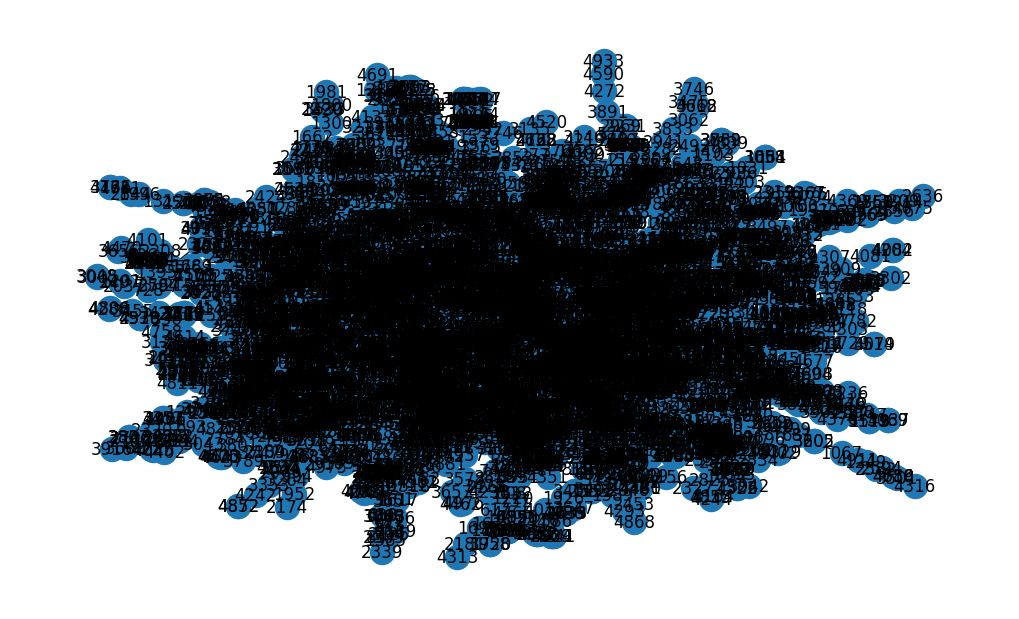

Maximum degree: 95, Minimum degree: 1


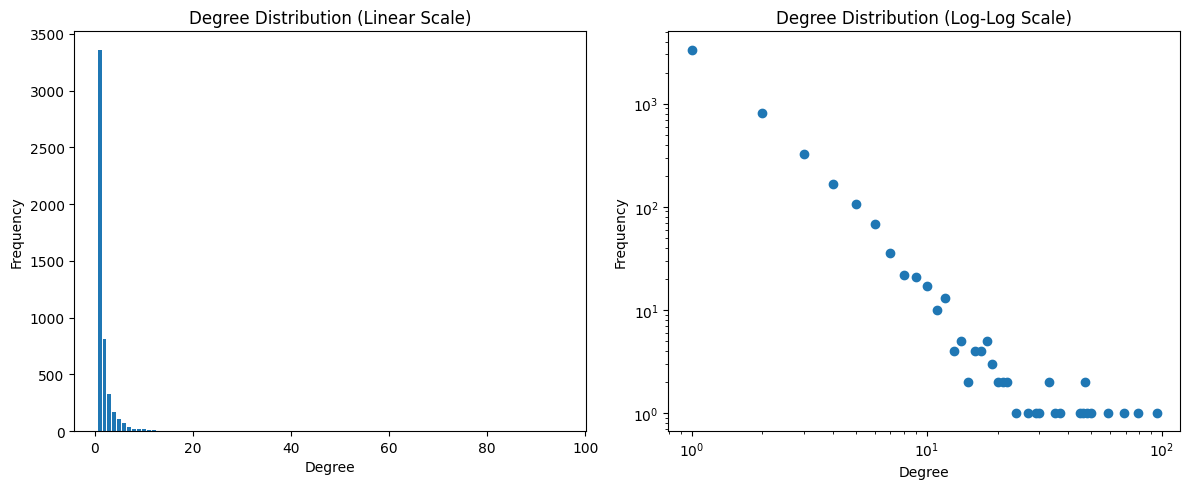

In [31]:

plot_graph(graph_5000_nodes)

# Assignment 1.2 Stats and visualization of the Rock Music Network

### Explain your process in words
#### As there is no specific "Explain your process in words" section in the Week 4 exercise, I assume the part "Document how you crawled the network" is meant.

1. First, simply describe the steps of the process (what you did, step by step)

2. Then, write a short section about which part of the process that was most difficult

3. Next write a short section about how you used LLMs to help you

4. Finally, compose a short section about what you would do differently if you had to do it again

In [ ]:
#1 The steps I took where to get all the article names from the wikipedia page. Then I called the method developed in lecture 1 to
# fetch html articles for each of the titles. Then I saved those articles in a new folder. After that, for each of the articles I used a regex pattern
# to extract all other articles on wikipedia they link to, based on the fact thay they use the pattern [[ xxx ]]
# I filtered all the references to only match the article titles we had from before
# that showed wich articles point to which other articles.
# I constructed the nodes and the directed edges from them to the other articles.
#
# #2 The most difficult part was to extract the data correctly from wikipedia and to make sure the regexes would find the right titles.
# For some of the titles, I had to replace some special characters like / with underscores _ then I did the same for the file names when saving them.
# 
# 3. I used LLMs to find a better way to extract data from wikipedia. I had to append the ?action=raw parameter to the query to get the markdown. 
# The I used the LLM to get the matches between articles, i.e elaborate teh algorithm to analyze th text from the article and to find matching patterns and save them in a dictionary.
# 
# 4. I would not do anything differently. This is a pretty straighforward way of cnstructing a graph between artists on wikipedia.
# But maybe I would not store all the files locally. Now that I know the file format, I would only get the text from the wikipedia page for each artist, check it for the patterns, 
# and then save all the patterns in a dictionary, where the key is the artist name. After I would do it for all articles, I would filter the value listst to only contain whatever
# is equal to a key from the dictionary. 


### Simple network statistics and analysis.

In [7]:
import networkx as nx
import re
import os

## the graph was saved in the Session 4 notebook
## here we just load it from that file
## Note: this graph is cleaned, i.e I removed nodes without in or out degrees 
## and we only have the largest component in here
artists_graph = nx.read_gexf("rock_artists_graph_cleaned.gexf")


What is the number of nodes in the network?

In [8]:
#1 number of nodes
print("Number of nodes:", artists_graph.number_of_nodes())

Number of nodes: 350


More importantly, what is the number of links?

In [9]:
# 2 number of links
print("Number of links:", artists_graph.number_of_edges())

Number of links: 4264


Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?

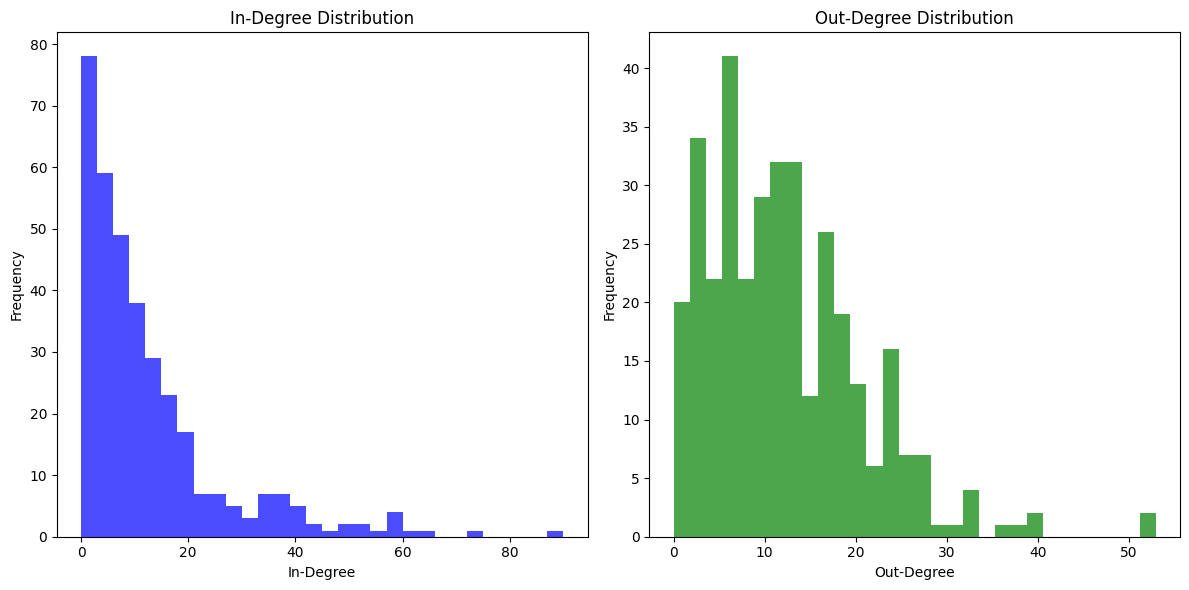

In [11]:
import matplotlib.pyplot as plt

# in degree distribution
in_degrees = [d for n,d in artists_graph.in_degree()]
# out degree distribution
out_degrees = [d for n,d in artists_graph.out_degree()]


## plot the in and out degree distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=30, color='blue', alpha=0.7)
plt.title('In-Degree Distribution')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(out_degrees, bins=30, color='green', alpha=0.7)
plt.title('Out-Degree Distribution')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [12]:
## I caan observer that the in-degree distribution is different from teh out-degree distribution.
# mainly, there are more nodes with fewer in-coming links. The plot is skewed to the right, meaning that on average there are more nodes with jsut a few incoming edges.
# one the other hand, the out-degrees are a bit more evenly distributed, althoug not entirely. most of the nodes have between 2 - 16 references to other artists. 


Compare the out-degree distribution to a random network with the same number of nodes and links.

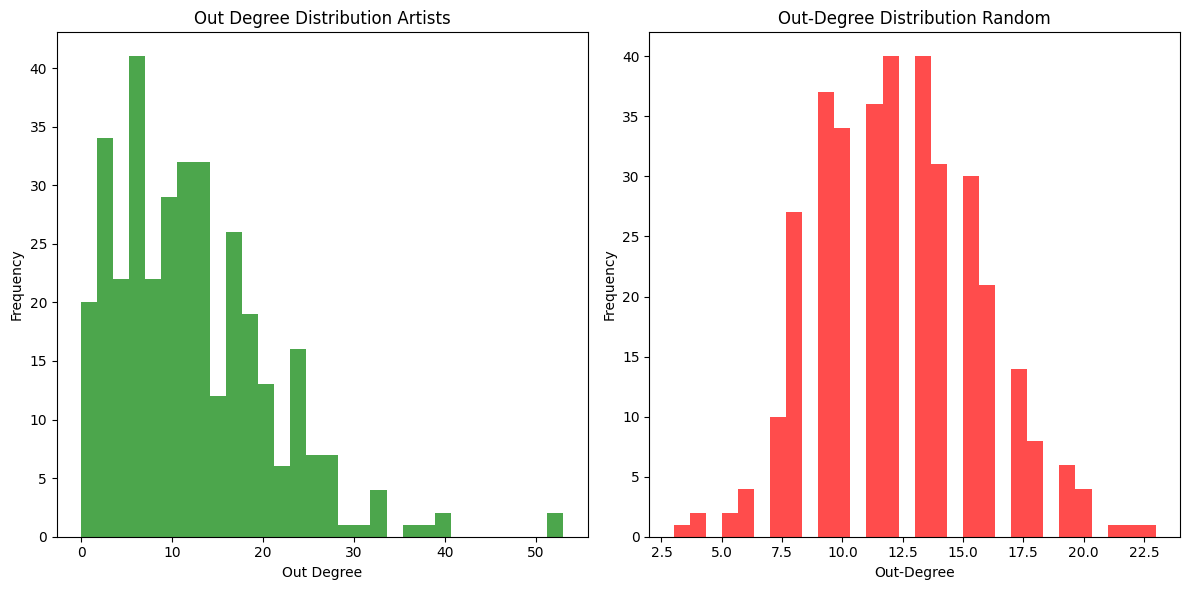

In [13]:
## construct a ranom directed network with 350 nodes and 4262 edges
random_graph = nx.gnm_random_graph(350, 4262, directed=True)

random_out_degrees = [d for n,d in random_graph.out_degree()]

## plot the in and out degree distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(out_degrees, bins=30, color='green', alpha=0.7)
plt.title('Out Degree Distribution Artists')
plt.xlabel('Out Degree')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(random_out_degrees, bins=30, color='red', alpha=0.7)
plt.title('Out-Degree Distribution Random')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [14]:

## we observe that in a r andom graph, the out-degree distribution is more centered and more evenly distributed.

Compare the in-degree distribution to a scale-free network with the same number of nodes.

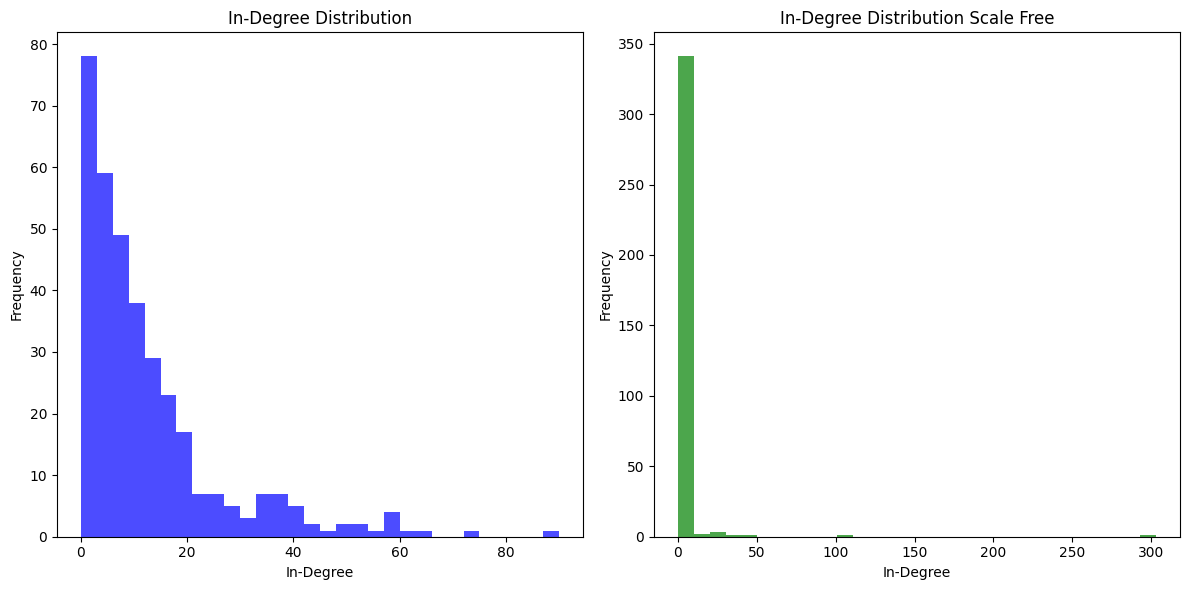

In [15]:
scale_free_graph = nx.scale_free_graph(350)

scale_free_in_degrees = [d for n,d in scale_free_graph.in_degree()]

## plot the in and out degree distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=30, color='blue', alpha=0.7)
plt.title('In-Degree Distribution')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(scale_free_in_degrees, bins=30, color='green', alpha=0.7)
plt.title('In-Degree Distribution Scale Free')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [16]:

### we see that most nodes on a scale-free network have 1-2 in-comming edges. Very few have more than 10. This is very different from real-world data,
# where we see as many as 60 or more than 80.

Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?

In [17]:
top_5_in_degree = sorted(artists_graph.in_degree(), key=lambda x: x[1], reverse=True)[:5]
top_5_out_degree = sorted(artists_graph.out_degree(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 In-Degree:", top_5_in_degree)
print("Top 5 Out-Degree:", top_5_out_degree)

Top 5 In-Degree: [('Led_Zeppelin', 90), ('Bob_Dylan', 73), ('Metallica', 64), ('David_Bowie', 60), ('U2', 59)]
Top 5 Out-Degree: [('Alice_in_Chains', 53), ('Deep_Purple', 52), ("Guns_N'_Roses", 40), ('Black_Sabbath', 39), ('Def_Leppard', 38)]


In [18]:

## it makes sense that those artists are the most references as they are indeed very influential
## I did not have any expectations on who would reference other artists. Maybe a bit surprised about Guns n Roses.

What are the 10 pages with the longest wiki entries?

In [19]:
top_10_longest_entries = sorted(artists_graph.nodes(data=True), key=lambda x: x[1]['text_len'], reverse=True)[:10]
print("Top 10 Longest Entries:", top_10_longest_entries)

Top 10 Longest Entries: [("Guns_N'_Roses", {'text_len': 370219, 'label': "Guns_N'_Roses"}), ('Coldplay', {'text_len': 294819, 'label': 'Coldplay'}), ('The_Rolling_Stones', {'text_len': 269857, 'label': 'The_Rolling_Stones'}), ('Chicago', {'text_len': 265720, 'label': 'Chicago'}), ('Paul_McCartney', {'text_len': 265280, 'label': 'Paul_McCartney'}), ('Bob_Dylan', {'text_len': 264180, 'label': 'Bob_Dylan'}), ('U2', {'text_len': 263343, 'label': 'U2'}), ('David_Bowie', {'text_len': 261301, 'label': 'David_Bowie'}), ('Elton_John', {'text_len': 256840, 'label': 'Elton_John'}), ('Avril_Lavigne', {'text_len': 247387, 'label': 'Avril_Lavigne'})]


### Let's build a simple visualization of the network

For the sake of the visualisation, let's convert our network to undirected graph

In [20]:
undirected_artist_graph = artists_graph.to_undirected()

Use the NetworkX command nx.spring_layout or nx.draw_kamada_kawai to draw the resulting undirected network.

Set up your plot so that node-size depends on the node degree.

Make the node color depend on the length of content attribute. I recommend choosing a color scheme that is quite simple

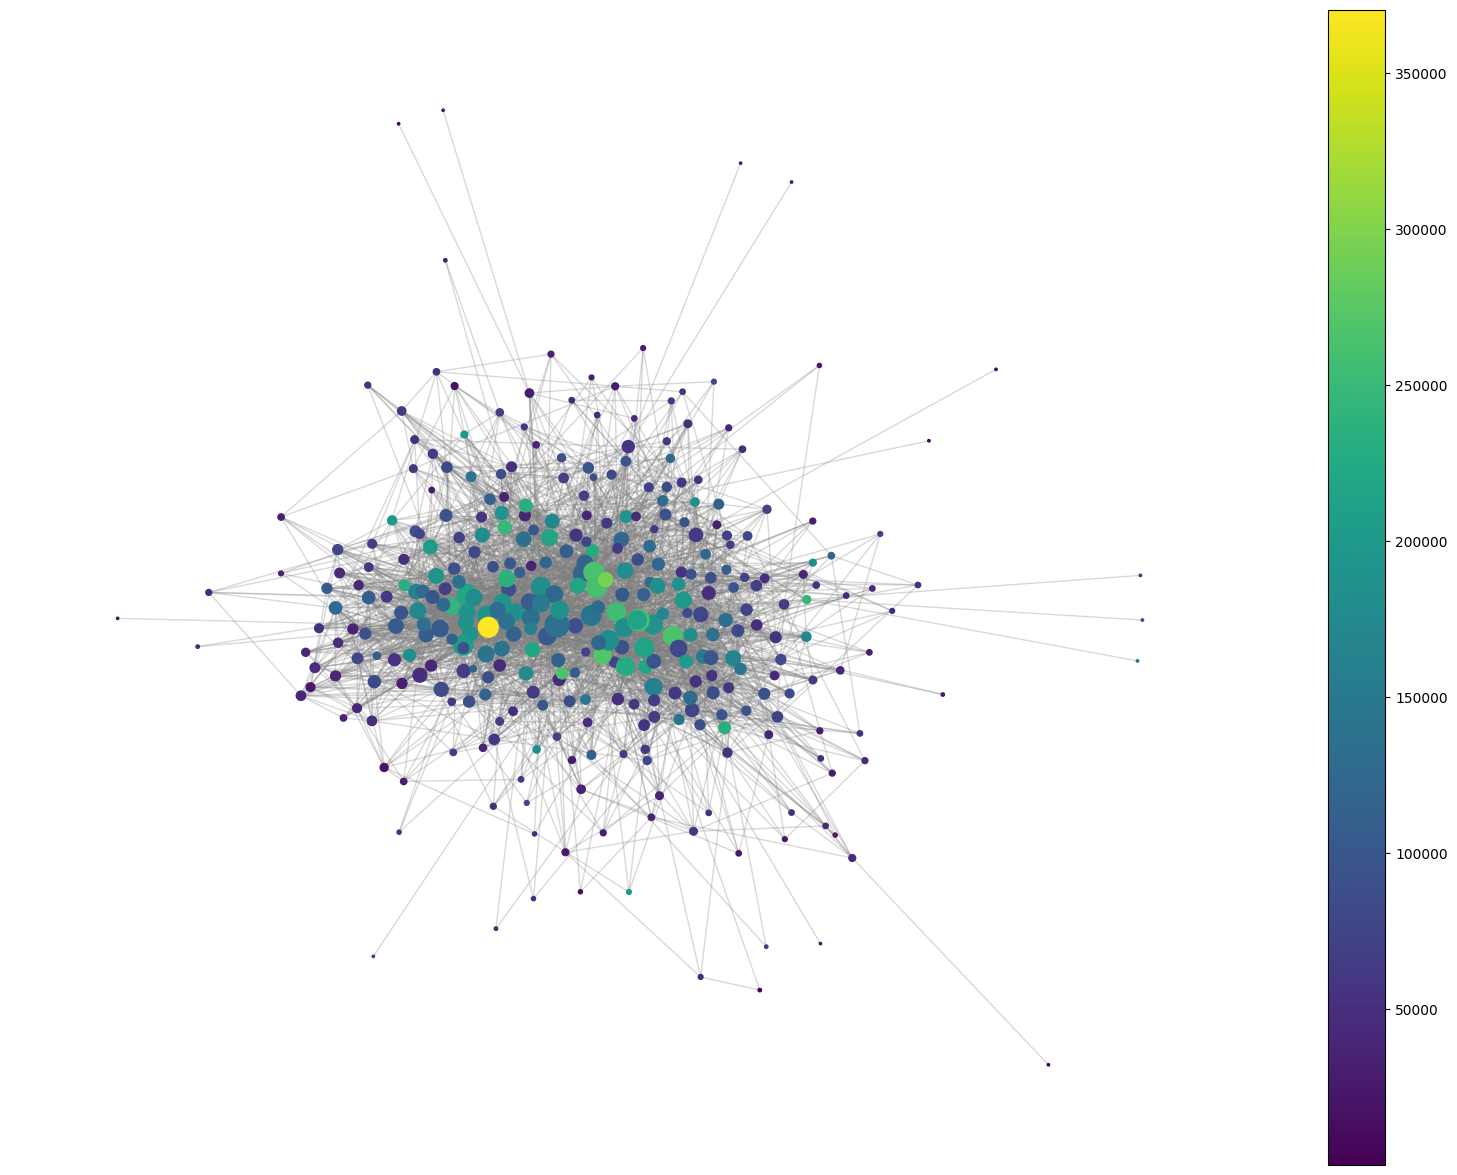

In [22]:
# compute layout
pos = nx.spring_layout(undirected_artist_graph)

# compute node sizes proportional to degree
degrees = dict(undirected_artist_graph.degree())
node_sizes = [degrees[n] * 3 for n in undirected_artist_graph.nodes()]  # scale by factor

text_lengths = nx.get_node_attributes(artists_graph, "text_len")
node_colors = [text_lengths.get(n, 0) for n in undirected_artist_graph.nodes()]


plt.figure(figsize=(20, 15))
nodes = nx.draw_networkx_nodes(
    undirected_artist_graph,
    pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.viridis   # you can try "Reds", "Greens", "viridis", etc.
)
nx.draw_networkx_edges(
    undirected_artist_graph,
    pos,
    edge_color="gray",
    alpha=0.3
)

plt.colorbar(nodes)  # adds a color scale bar
plt.axis("off")
plt.show()